# **텐서**

In [ ]:
import torch

x = torch.tensor([[1, 2],[3, 4]])
y = torch.zeros(2,3) # 0으로 채워진 2x3 탠서
z = torch.randn(3,4) # 정규분포에서 샘플링된 3x4 텐서

In [7]:
x

tensor([[1, 2],
        [3, 4]])

In [8]:
y

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [9]:
z

tensor([[ 0.1204,  0.3982,  1.3321, -0.0167],
        [ 1.3909,  0.0080,  0.0320,  0.2773],
        [-0.7342,  0.2216, -0.5310,  0.1217]])

# **자동미분**

In [16]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


# **nn.Module**

In [17]:
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self):
        super.__init__() # 상속되는 클래스 초기화하는 것임
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# **DataLoader**

In [18]:
from torch.utils.data import Dataset, DataLoader

train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4
)

NameError: name 'train_dataset' is not defined

# **Optimizer**

In [21]:
import torch.optim as optim

optimizer = optim.Adam(model.parametrers(), lr=0.001)
optimizer.zero_grad() # 그래디언트 초기화
loss.backward()       # 역전파
optimizer.step()      # 파라미터 업데이트

NameError: name 'model' is not defined

# **loss function(손실 함수)**

In [22]:
criterion == nn.CrossEntropyLoss()
loss = criterion(outputs, targets)

NameError: name 'criterion' is not defined

# **Device 관리**

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
inputs = inputs.to(device)

NameError: name 'model' is not defined

In [28]:
import torch
import torch.nn as nn

# 디바이스 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 간단한 모델 생성
model = nn.Linear(10,5)
model = model.to(device)

# 입력 데이터 생성
inputs = torch.randn(3, 10, requires_grad=True)
inputs = inputs.to(device)

# 이제 모델과 입력이 같은 디바이스에 있으므로 연산 가능
outputs= model(inputs)

# **예시 한 cycle (이미지)**

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

for PIL import Image

import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 준비 및 전처리
class CustomDataset(Dataset):
    def __init__(self, train=True):
        self.mnist = datasets.MNIST(
            root = './data',
            train = train,
            download=True,
            transform=transforms.Compose([
                transforms.ToTensor(), # PIL 이미지를 텐서로 변환
                transforms.Normalize((0.1307),(0.3081,)) # 정규화
            ])
        )

    def __len__(self):
        return len(self.mnist)

    def __getitem__(self, idx):
        image, label = self.mnist[idx]
        return image, label

# 2. 모델 아키텍처 정의
class AdvancedCNN(nn.Module):
    def __init__(self):
        super(AdvancedCNN, self).__init__()
        # 첫 번째 컨볼루션 블록
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2)
        )

        # 두 번째 컨볼루션 블록
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64,64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2)
        )

        # 완전연결층
        self.fc = nn.Sequential(
            nn.Dropout(0.5), # 과적합 방지
            nn.Linear(64 * 7 * 7, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(-1, 64 * 7 * 7) # 펼치기
        x = self.fc(x)
        return x

# 3. 학습 설정
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device='cuda'):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        # 학습 모드
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # 그래디언트 초기화
            optimizer.zero_grad()

            # 순전파
            outputs = model(images)
            loss = criterion(outputs, labels)

            # 역전파 및 최적화
            loss.backward()
            optimizer.step() # 가중치 업데이트

            running_loss += loss.item()

        epoch_train_loss = running_loss / len(train_loader)
        train_losses.append(epoch_train_loss)

        # 검증 모드
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad(): # 그래디언트 계산 비활성화
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_val_loss = val_loss / len(val_loader)
        val_losses.append(epoch_val_loss)

        # 모델 저장 (검증 손실이 개선될 때만)
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            torch.save(model.state_dict(), 'best_model.pth')

        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train loss: {epoch_train_loss:.4f}")
        print(f"Val Loss: {epoch_val_loss:.4f}")
        print(f"Accuracy: {100 * correct / total:.2f}%\n")

    return train_losses, val_losses

def predict_image(model, image_path, device):
    # 이미지 전처리
    transform = transforms.Compose([
        transforms.Resize((28,28)),                # MNIST 크기로 리사이즈
        transforms.Grayscale(1),                   # 흑백 이미지로 변환
        transforms.ToTensor(),                     # 텐서로 변환
        transforms.Normalize((0.1307,),(0.3081,))  # MNIST 데이터셋과 동일하게 정규화
    ])

    # 이미지 로드 및 전처리
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # 배치 차원 추가
    image = image.to(device)

    # 예측 모드로 설정
    model.eval()

    # 예측 수행
    with torch.no_grad(): # 그래디언트 계산 비활성화
        outputs = model(image)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        predicted_class = torch.argmax(outputs, dim=1).item()
        confidence = probabilities[0][predicted_class].item()

    return predicted_class, confidence

def load_model(model_path, device):
    model = AdvancedCNN().to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    return model

Epoch [1/10]
Train loss: 0.1333
Val Loss: 0.0352
Accuracy: 98.81%

Epoch [2/10]
Train loss: 0.0697
Val Loss: 0.0363
Accuracy: 98.92%

Epoch [3/10]
Train loss: 0.0568
Val Loss: 0.0242
Accuracy: 99.29%

Epoch [4/10]
Train loss: 0.0556
Val Loss: 0.0220
Accuracy: 99.34%

Epoch [5/10]
Train loss: 0.0474
Val Loss: 0.0238
Accuracy: 99.35%

Epoch [6/10]
Train loss: 0.0431
Val Loss: 0.0257
Accuracy: 99.32%

Epoch [7/10]
Train loss: 0.0381
Val Loss: 0.0232
Accuracy: 99.40%

Epoch [8/10]
Train loss: 0.0358
Val Loss: 0.0218
Accuracy: 99.48%

Epoch [9/10]
Train loss: 0.0311
Val Loss: 0.0261
Accuracy: 99.46%

Epoch [10/10]
Train loss: 0.0327
Val Loss: 0.0233
Accuracy: 99.46%



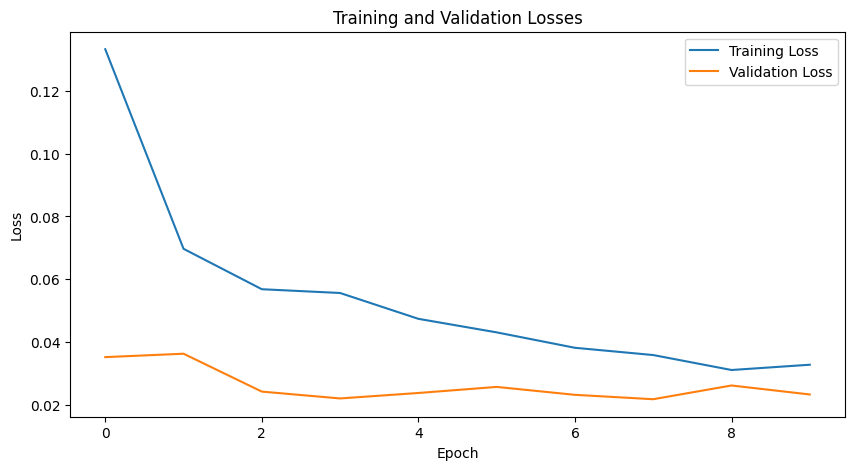

In [45]:
# 장치 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 데이터로더 설정
train_dataset = CustomDataset(train=True)
val_dataset = CustomDataset(train=False)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# 모델 초기화
model = AdvancedCNN().to(device)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

train_losses, val_losses = train_model(
    model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device=device
)

plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **데이터 탐색 및 시각화 코드**

In [26]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# 데이터셋 생성
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,),(0.3081,))
    ])
)

# 데이터로더 생성
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 1. 데이터 형태 확인
# 첫 번째 배치 가져오기
images, labels = next(iter(train_loader))
print(f"배치 크기: {images.shape}")
print(f"레이블 크기: {labels.shape}")
print(f"레이블 예시: {labels[:10]}")

배치 크기: torch.Size([64, 1, 28, 28])
레이블 크기: torch.Size([64])
레이블 예시: tensor([3, 2, 4, 9, 9, 4, 6, 2, 8, 7])


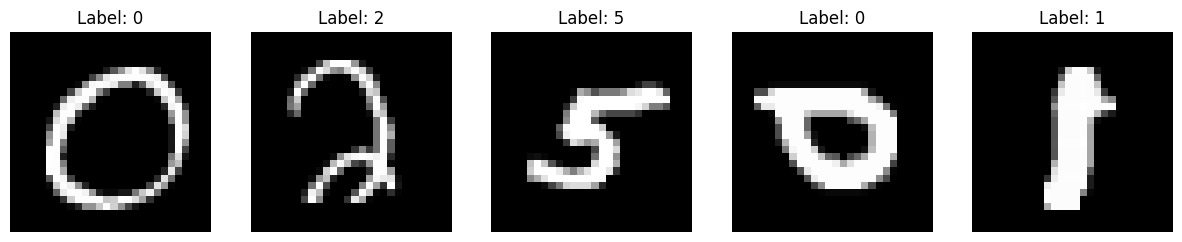

In [14]:
# 2. 이미지 시각화 함수
def show_images(images, labels, num_images=5):
    plt.figure(figsize=(15,3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        # 정규화된 이미지를 원래대로 복원 (시각화를 위해)
        img = images[i].squeeze() # [1, 28, 28] -> [28, 28]
        img = img * 0.3081 * 0.1307 # 정규화 복원
        plt.imshow(img, cmap='gray')
        plt.title(f'Label: {labels[i].item()}')
        plt.axis('off')
    plt.show()

show_images(images,labels)

In [19]:
from tqdm.notebook import tqdm

# 3. 데이터셋 통계 확인
# 레이블 분포 확인
all_labels = []
for _, labels in tqdm(train_loader):
    all_labels.extend(labels.numpy())

label_counts = np.bincount(all_labels)
print("\n클래스별 데이터 수")
for label, count in enumerate(label_counts):
    print(f"레이블 {label}: {count}개")

  0%|          | 0/938 [00:00<?, ?it/s]


클래스별 데이터 수
레이블 0: 5923개
레이블 1: 6742개
레이블 2: 5958개
레이블 3: 6131개
레이블 4: 5842개
레이블 5: 5421개
레이블 6: 5918개
레이블 7: 6265개
레이블 8: 5851개
레이블 9: 5949개


In [23]:
# 4. 단일 이미지 상세 정보
single_image[0]
print(f"\n단일 이미지 정보:")
print(f"크기: {single_image.shape}")
print(f"최솟값: {single_image.min():.3f}")
print(f"최댓값: {single_image.max():.3f}")
print(f"평균값: {single_image.mean():.3f}")
print(f"표준편차: {single_image.std():.3f}")


단일 이미지 정보:
크기: torch.Size([1, 28, 28])
최솟값: -0.424
최댓값: 2.821
평균값: -0.266
표준편차: 0.623


# **예시 한 cycle (자연어)**

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchtext.datasets import IMDB
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import numpy as np

# 1. 데이터 준비 및 전처리
class IMDBDataset(Dataset):
    def __init__(self, split):
        # IMDB 데이터셋 로드 (split은 'train' 또는 'test')
        self.data = list(IMDB(split=split))
        self.tokenizer = get_tokenizer('basic_english')

        # 어휘 사전 구축
        def yield_tokens():
            for label, text in self.data:
                yield self.tokenizer(text)

        self.vocab = build_vocab_from_iterator(yield_tokens(), specials=['<unk>','<pad>'])
        self.vocab.set_default_index(self.vocab['<unk>'])

        # 특수 토큰 인덱스
        self.pad_idx = self.vocab['<pad>']
        self.max_len = 256

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        label, text = self.data[idx]
        # 텍스트를 토큰화하고 인덱스로 변환
        tokens = self.tokenizer(text)
        token_ids = self.vocab(tokens)

        # 패딩 처리
        if len(token_ids) < self.max_len:
            token_ids.extend([self.pad_idx] * (self.max_len - len(token_ids)))
        else:
            token_ids = token_ids[:self.max_len]

        return torch.tensor(token_ids), torch.tensor(label)

